# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


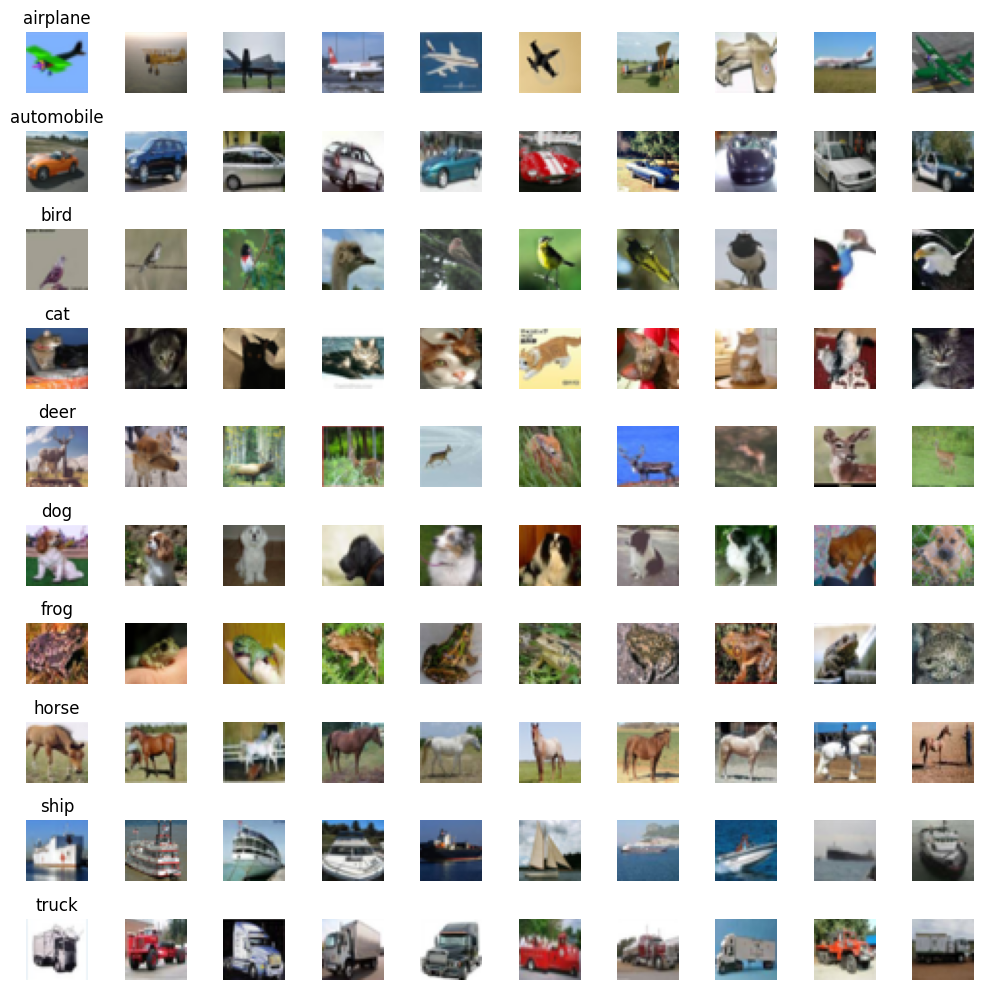

In [2]:
# Visualize the first 10 images in the training set
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

plt.figure(figsize=(10, 10))
for class_idx in range(10):
    idxs = np.where(y_train.flatten() == class_idx)[0]
    selected = np.random.choice(idxs, 10, replace=False)
    for i, img_idx in enumerate(selected):
        plt.subplot(10, 10, class_idx * 10 + i + 1)
        plt.imshow(x_train[img_idx])
        plt.axis('off')
        if i == 0:
            plt.title(class_names[class_idx])
plt.tight_layout()
plt.show()

In [3]:
# Convert classes to one-hot encoding
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

print(y_train_onehot.shape)
print(y_test_onehot.shape)

(50000, 10)
(10000, 10)


In [4]:
# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [5]:
from keras.backend import clear_session
clear_session()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [7]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)
print(model.metrics_names)

['loss', 'compile_metrics']


In [8]:
# Train the model
history = model.fit(
    x_train, y_train_onehot,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test_onehot)
)
print(history.history.keys())

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.1671 - loss: 2.2691 - val_accuracy: 0.2240 - val_loss: 2.1538
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2493 - loss: 2.1183 - val_accuracy: 0.2699 - val_loss: 2.0352
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2945 - loss: 2.0052 - val_accuracy: 0.3249 - val_loss: 1.9489
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3267 - loss: 1.9378 - val_accuracy: 0.3352 - val_loss: 1.9080
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3454 - loss: 1.8951 - val_accuracy: 0.3441 - val_loss: 1.8722
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3488 - loss: 1.8682 - val_accuracy: 0.3496 - val_loss: 1.8564
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3618 - loss: 1.8375 - val_accuracy: 0.3671 - val_loss: 1.8215
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3669 - loss: 1.8227 - val_accuracy: 0.3749 - val_los

*   Plot the cross entropy loss curve and the accuracy curve

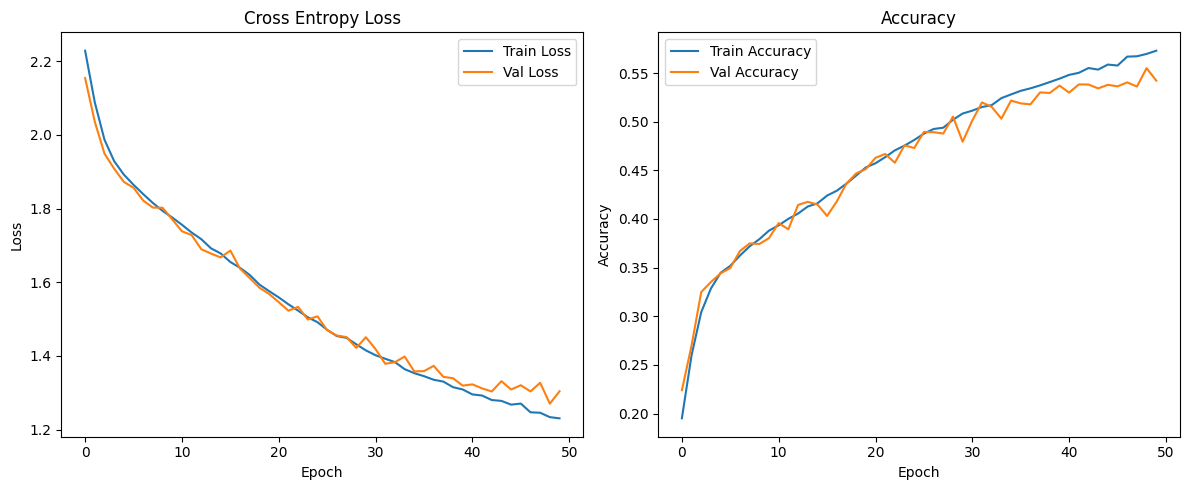

In [9]:
# Plot cross-entropy loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Cross Entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [10]:
from keras.backend import clear_session
clear_session()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Define the VGG-like model
vgg_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

vgg_model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [12]:
# Compile the model
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

# Train the model
vgg_history = vgg_model.fit(
    x_train, y_train_onehot,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test_onehot)
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 102ms/step - accuracy: 0.1439 - loss: 2.2893 - val_accuracy: 0.2310 - val_loss: 2.2296
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2541 - loss: 2.1889 - val_accuracy: 0.2499 - val_loss: 2.0629
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2759 - loss: 2.0350 - val_accuracy: 0.3108 - val_loss: 1.9842
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3103 - loss: 1.9599 - val_accuracy: 0.3565 - val_loss: 1.8749
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3414 - loss: 1.8894 - val_accuracy: 0.3626 - val_loss: 1.8364
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3578 - loss: 1.8389 - val_accuracy: 0.3519 - val_loss: 1.8675
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3741 - loss: 1.7942 - val_accuracy: 0.3884 - val_loss: 1.7540
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3886 - loss: 1.7442 - val_accuracy: 0.3923 -

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


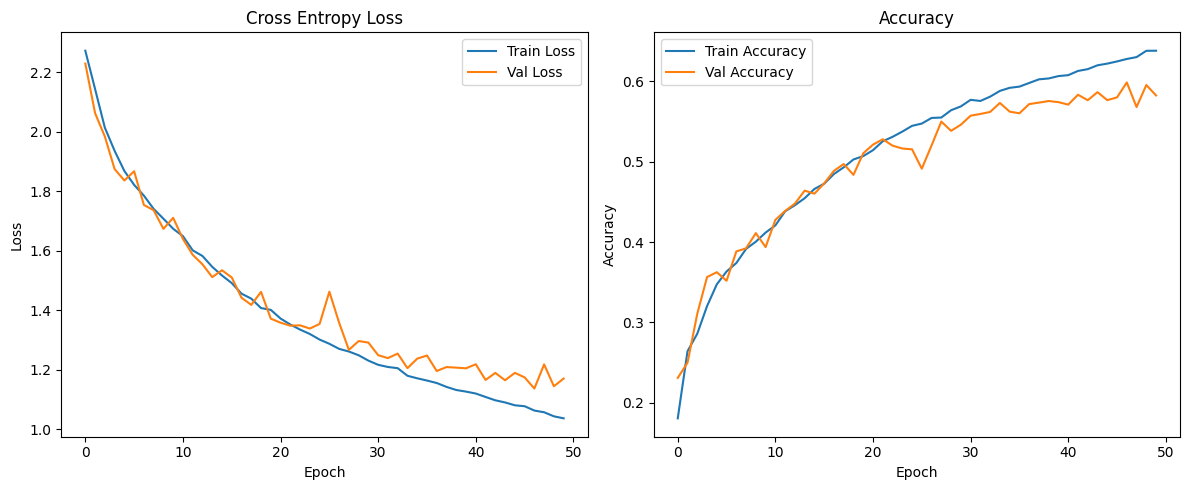

In [13]:
# Plot cross-entropy loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(vgg_history.history['loss'], label='Train Loss')
plt.plot(vgg_history.history['val_loss'], label='Val Loss')
plt.title('Cross Entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['accuracy'], label='Train Accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Comment on the observation**

The deeper VGG-like model shows improved performance compared to the simpler model. The training and validation accuracy curves are higher, and the loss curves are lower, indicating better learning and generalization. However, if the gap between training and validation accuracy increases significantly, it may suggest overfitting. Overall, stacking more convolutional layers helps the model learn more complex features, leading to better results on CIFAR-10.

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


<Figure size 1000x800 with 0 Axes>

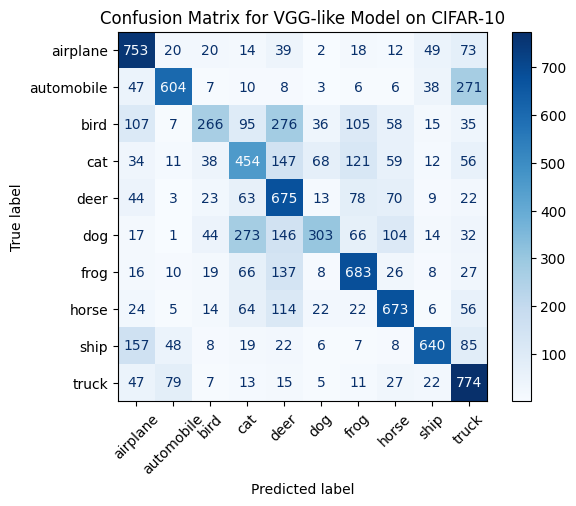

In [14]:
# Predict output for the test split
y_pred_probs = vgg_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# True labels
y_true = y_test.flatten()

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix for VGG-like Model on CIFAR-10")
plt.show()


**Comment here :**

The confusion matrix shows which classes are most often confused by the model.
For example, 'cat' and 'dog' or 'automobile' and 'truck' may have higher confusion due to visual similarity.
Diagonal values represent correct predictions; off-diagonal values indicate misclassifications.

*    Print the test accuracy for the trained model.

In [15]:
# Print accuracy
test_accuracy = np.mean(y_pred == y_true)
print("Test accuracy: {:.2f}%".format(test_accuracy * 100))

Test accuracy: 58.25%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [16]:
from keras.backend import clear_session
clear_session()

In [17]:
# Define the complete VGG architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

vgg_complete = Sequential([
    # Block 1: 2 x Conv2D(64) + MaxPooling
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    # Block 2: 2 x Conv2D(128) + MaxPooling
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    # Block 3: 2 x Conv2D(256) + MaxPooling
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    # Classifier
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

vgg_complete.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [18]:
# Compile the model
vgg_complete.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [19]:
# Train CIFAR-10 model
from tensorflow.image import resize

x_train_resized = resize(x_train, (64, 64)).numpy()
x_test_resized = resize(x_test, (64, 64)).numpy()

# Train the model for 10 epochs with batch size 512
vgg_complete_history = vgg_complete.fit(
    x_train_resized, y_train_onehot,
    epochs=10,
    batch_size=512,
    validation_data=(x_test_resized, y_test_onehot)
)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 90s 605ms/step - accuracy: 0.1100 - loss: 2.3001 - val_accuracy: 0.1494 - val_loss: 2.2921
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.1768 - loss: 2.2867 - val_accuracy: 0.2296 - val_loss: 2.2507
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.2235 - loss: 2.2137 - val_accuracy: 0.2751 - val_loss: 2.0680
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.2451 - loss: 2.0912 - val_accuracy: 0.2543 - val_loss: 2.1152
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.2871 - loss: 2.0136 - val_accuracy: 0.3138 - val_loss: 1.9503
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.3206 - loss: 1.9274 - val_accuracy: 0.3210 - val_loss: 1.8749
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.3344 - loss: 1.8737 - val_accuracy: 0.3598 - val_loss: 1.7928
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.3576 - loss: 1.8070 - val_accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


<Figure size 1000x800 with 0 Axes>

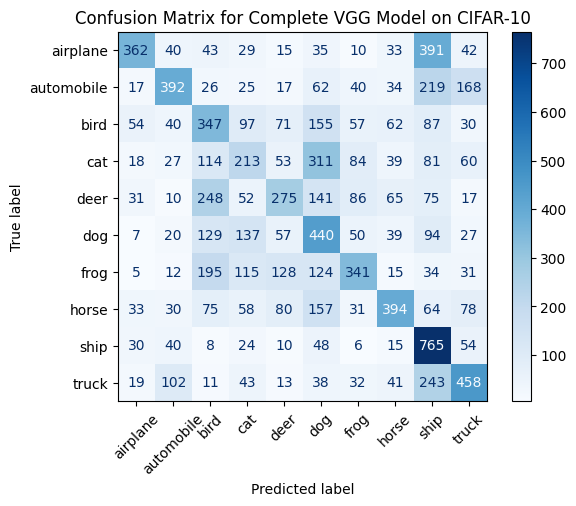

In [20]:
# Predict output for the test split
y_pred_probs = vgg_complete.predict(x_test_resized)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix for Complete VGG Model on CIFAR-10")
plt.show()

The new confusion matrix for the complete VGG model shows improved classification performance compared to simpler models. Most predictions are concentrated along the diagonal, indicating correct classifications. However, some classes are still confused with visually similar ones, such as 'cat' vs 'dog' or 'automobile' vs 'truck'. The off-diagonal values are lower than before, showing that the deeper model reduces misclassifications, but some confusion remains for challenging class pairs. This suggests the model has learned more complex features, but perfect separation is still difficult for certain categories.

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

##### 1 - Use of activation functions:

It introduces non-linearity into neural networks, allowing them to learn complex patterns and relationships in the data. Without activation functions, the network would only be able to model linear functions, regardless of its depth. Non-linear activation functions enable the network to approximate any function and solve complex tasks like image and speech recognition.

##### 2 - Key Differences between sigmoid and softmax:

- Sigmoid activation outputs a value between 0 and 1 for each input, treating each output independently. It is typically used for binary classification or multi-label problems, where each class is predicted separately.
- Softmax activation outputs a probability distribution over multiple classes, where all output values sum to 1. It is used for multi-class classification, assigning a probability to each class so that the model predicts only one class per input.

##### 3 - Key Differences between categorical crossentropy and binary crossentropy loss:

- Binary crossentropy is used for binary classification problems (two classes) or multi-label classification (each label is independent and uses sigmoid activation). It compares each output neuron independently to a target value of 0 or 1. Use it for binary or multi-label tasks.
- Categorical crossentropy is used for multi-class classification problems where each sample belongs to only one class (single-label, more than two classes) and uses softmax activation. It compares the predicted probability distribution over all classes to the one-hot encoded true label. Use it for multi-class, single-label tasks.